In [1]:
import sys
!{sys.executable} -m pip install ipympl

  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 9.6 MB/s eta 0:00:00ta 0:00:01
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)


In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import json

In [131]:
with open('../outputs/1713679281/posterior_vals.json', 'r') as fh:
    data = json.load(fh)

In [136]:
def plot(y, mean, std, t):
    x = 1 + np.arange(len(y))
    plt.clf()
    plt.plot(x, y, label="True")
    plt.plot(x, mean, label="Posterior", color="orange")
    plt.fill_between(x, mean-std, mean+std, alpha=0.2, color="orange")
    plt.legend()
    plt.title(f"t = {t}")
    plt.ylabel("Similarity")
    plt.xlabel("True Rank")
    plt.show()

In [137]:
def posterior_at_t(data, t):
    vals = data[f'{t}']
    y, mean, std = list(zip(*vals))
    y, mean, std = map(np.array, [y, mean, std])
    plot(y, mean, std, t)

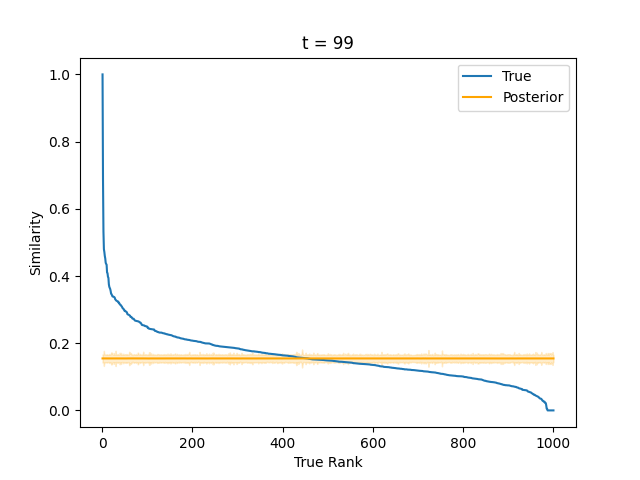

In [138]:
posterior_at_t(data, 99)

In [150]:
from sklearn.linear_model import LinearRegression
vals = data['99']
y, mean, std = list(zip(*vals))
y, mean, std = map(np.array, [y, mean, std])
x = 1 + np.arange(len(y))
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), mean)
reg.coef_

array([-4.39011884e-08])

In [151]:
reg.score(x.reshape(-1,1), mean)

0.07364300730830708

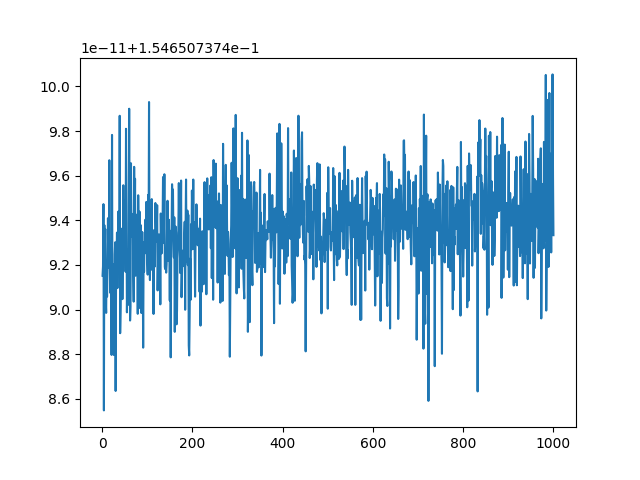

In [152]:
plt.clf()
plt.plot(x, reg.predict(mean.reshape(-1,1)))
plt.show()

In [154]:
!cd .. && python examples/run_fixed_features_20q.py --data_dir="data/twentyquestions/datasets/word2vec-2000" --dataset="computer" --n_init_data=5 --n_seeds=1 --model="t5-base" --prompt_strategy="hint" --hint="Hint: the hidden word is an example of a machine." --feat_extraction_strategy="average" --T=100 --visualize_posterior

Script arguments:
{'run_id': None, 'data_dir': 'data/twentyquestions/datasets/word2vec-2000', 'cache_dir': 'cache', 'out_dir': 'outputs', 'dataset': 'computer', 'test_idx_or_word': None, 'prompt_strategy': 'hint', 'hint': 'Hint: the hidden word is an example of a machine.', 'model': 't5-base', 'init_strategy': 'random', 'acquisition_fn': 'thompson_sampling', 'cuda': True, 'rescale_scores': False, 'save_word_specific_dataset': False, 'feat_extraction_strategy': 'average', 'additive_features': False, 'exit_after_feat_extraction': False, 'visualize_posterior': True, 'reset_cache': False, 'seed': 9999, 'n_init_data': 5, 'T': 100, 'n_seeds': 1, 'plot_y': 'rank', 'debug': False}

HIDDEN WORD: "computer"

Loaded cached features.

Seed 9999:
[Best f(x="snooper") = 0.392 (rank=25), curr f(x="scissors") = 0.262 (rank=256)]
Hidden word ("computer") not found. Best found: f(x="snooper") = 0.392 (rank=25).
Best found by random search: f(x="lab") = 0.445 (rank=9).
Saved plot at outputs/1713683428/se